In [3]:
from cobra.io import load_model
from cobra.sampling import sample
import scipy
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import numpy as np
from cobra.flux_analysis import flux_variability_analysis
import cobra

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
model = load_model("iJO1366")
BOUND=30000

In [5]:
for reaction in model.reactions:
    LB, UB = reaction.bounds
    if LB==-1000: LB = -BOUND
    if UB== 1000: UB =  BOUND
    reaction.bounds=(LB,UB)

In [6]:
model.reactions.EX_glc__D_e.bounds = (-10,BOUND)
model.reactions.EX_cbl1_e.bounds = (-BOUND,0)
model.reactions.ATPM.bounds = (0,BOUND)

In [7]:
s = pd.read_csv('sampled_flux_distributions.csv',index_col=0)

In [16]:
log2

,N° variables,Time (s),Status,Memory (MB)
Condition,,,,
Ecoli_iJO1366_glucose_iter_999,5166,2.731782,Solve_Succeeded,1277.347656


In [8]:
all_flux_dataframes, all_logs_dataframes = [],[]
for i in range(1000):
    s2i = pd.read_csv(  f"./results/teraflux_iJO1366_{i}.fluxes.csv",index_col=0)
    s2i_transposed = s2i.T
    all_flux_dataframes.append(s2i_transposed)
s2       = pd.concat(all_flux_dataframes, ignore_index=True)    


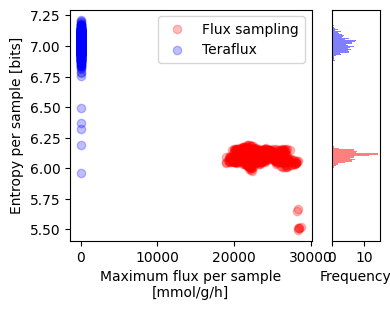

In [24]:
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig, ax1 = plt.subplots(figsize=(4, 3/4*4))

# Scatterplot for Dataset 1
Hs1 = []
maxFluxes1 = []
for i in range(s.shape[0]):
    fluxes = s.loc[i].abs()
    p = fluxes / fluxes.sum()
    Hs1.append(scipy.stats.entropy(p,base=2))
    maxFluxes1.append(fluxes.max())
ax1.scatter(maxFluxes1, Hs1, alpha=0.25, label="Flux sampling", color='red')

# Scatterplot for Dataset 2
Hs2 = []
maxFluxes2 = []
for i in range(s2.shape[0]):
    fluxes = s2.loc[i].abs()
    p = fluxes / fluxes.sum()
    Hs2.append(scipy.stats.entropy(p,base=2))
    maxFluxes2.append(fluxes.max())
ax1.scatter(maxFluxes2, Hs2, alpha=0.25, label="Teraflux", color='blue')


# Scatterplot customization
ax1.set_xlabel("Maximum flux per sample\n[mmol/g/h]")
ax1.set_ylabel("Entropy per sample [bits]")
ax1.legend()
#ax1.set_xlim([0,40])

# Create a new axis for the histograms outside the scatterplot
divider = make_axes_locatable(ax1)

# Right-side histogram for Hs
ax_hist_right = divider.append_axes("right", size="20%", pad=0.2, axes_class=type(ax1))
ax_hist_right.hist(Hs1, bins=60, orientation='horizontal', color='red', alpha=0.5, label="Flux sampling",density=True)
ax_hist_right.hist(Hs2, bins=150, orientation='horizontal', color='blue', alpha=0.5, label="Teraflux",density=True)
ax_hist_right.set_xlabel("Frequency")
ax_hist_right.yaxis.set_major_locator(MaxNLocator(integer=True))
ax_hist_right.yaxis.set_ticks([]) 

#plt.show()
plt.savefig("fig22.svg")

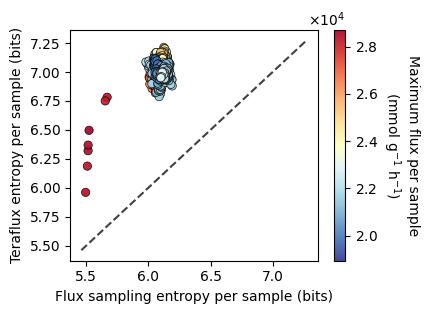

In [30]:
import matplotlib.ticker as mticker

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2)) # Set the range for when to use scientific notation


fig, ax = plt.subplots(figsize=(4, 3/4*4))
scatter=ax.scatter(Hs1,Hs2,c=maxFluxes1, cmap='RdYlBu_r', alpha=0.9, edgecolors='black', linewidth=0.5)
# Get the current axis limits
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# Plot the y=x line
ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0, label='y=x')
ax.set_ylabel("Teraflux entropy per sample (bits)")
ax.set_xlabel("Flux sampling entropy per sample (bits)")


# 4. Add the colorbar to show the mapping of values to colors
cbar = fig.colorbar(scatter, ax=ax)
cbar.ax.yaxis.set_major_formatter(formatter)
cbar.set_label('Maximum flux per sample\n(mmol g$^{-1}$ h$^{-1}$)', rotation=270, labelpad=30)
plt.savefig("fig2_iJO1366_map.svg")

In [19]:
import pandas as pd

all_log_dataframes = []

for i in range(1000):
    try:
        # Read the file
        log2i = pd.read_csv(f"./results/teraflux_iJO1366_{i}.log.tsv", sep="\t", index_col=0)
        

        
        # Add to list
        all_log_dataframes.append(log2i)
        
    except FileNotFoundError:
        print(f"Warning: File index {i} not found. Skipping.")
        continue

# Concatenate all at once
if all_log_dataframes:
    log2 = pd.concat(all_log_dataframes)
    # Optional: Reset index if you want a clean 0..N index
    # log2.reset_index(drop=True, inplace=True) 
    print(f"Successfully concatenated {len(log2)} rows.")
else:
    print("No dataframes were loaded.")
log2

Successfully concatenated 1000 rows.


,N° variables,Time (s),Status,Memory (MB)
Condition,,,,
Ecoli_iJO1366_glucose_iter_0,5166,5.787403,Solved_To_Acceptable_Level,1256.089844
Ecoli_iJO1366_glucose_iter_1,5166,5.319696,Solved_To_Acceptable_Level,1419.230469
Ecoli_iJO1366_glucose_iter_2,5166,5.961554,Solved_To_Acceptable_Level,1268.554688
Ecoli_iJO1366_glucose_iter_3,5166,5.398199,Solved_To_Acceptable_Level,1482.117188
Ecoli_iJO1366_glucose_iter_4,5166,7.271210,Solved_To_Acceptable_Level,973.449219
...,...,...,...,...
Ecoli_iJO1366_glucose_iter_995,5166,2.745005,Solve_Succeeded,1094.070312
Ecoli_iJO1366_glucose_iter_996,5166,2.696872,Solve_Succeeded,958.156250
Ecoli_iJO1366_glucose_iter_997,5166,2.773975,Solve_Succeeded,1178.835938


/tmp/ipykernel_281361/2591951834.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x, y, z = x[idx], y[idx], z[idx]


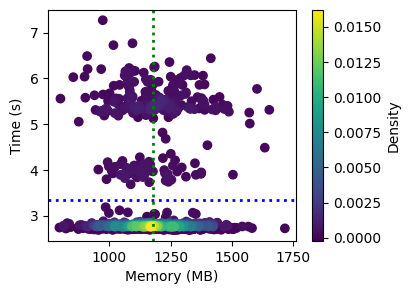

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(4, 3/4*4))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')

    return ax
density_scatter( log2["Memory (MB)"],log2["Time (s)"], bins = [30,30] )

plt.xlabel("Memory (MB)")
plt.ylabel("Time (s)")
# Add a vertical dotted line at the mean memory value
plt.axvline(x=log2["Memory (MB)"].mean(), color='green', linestyle=':', linewidth=2)

# Add a horizontal dotted line at the mean time value
plt.axhline(y=log2["Time (s)"].mean(), color='blue', linestyle=':', linewidth=2)
plt.savefig("fig2_iJO1366_memtime.svg")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


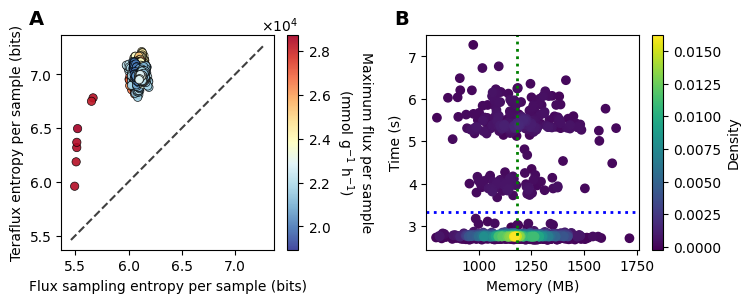

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

# Create a single figure with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11*0.7, 4.5*0.7))

# =========================================================
# PANEL A: Entropy Map (formerly fig2_iJO1366_map.svg)
# =========================================================
axA = axes[0]

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))

# Scatter plot
scatterA = axA.scatter(Hs1, Hs2, c=maxFluxes1, cmap='RdYlBu_r', alpha=0.9, edgecolors='black', linewidth=0.5)

# Reference y=x line
lims = [
    np.min([axA.get_xlim(), axA.get_ylim()]),  
    np.max([axA.get_xlim(), axA.get_ylim()]),  
]
axA.plot(lims, lims, 'k--', alpha=0.75, zorder=0, label='y=x')

# Labels and Panel A annotation
axA.set_xlabel("Flux sampling entropy per sample (bits)")
axA.set_ylabel("Teraflux entropy per sample (bits)")
axA.text(-0.15, 1.05, "A", transform=axA.transAxes, size=14, weight='bold')

# Colorbar for Panel A
cbarA = fig.colorbar(scatterA, ax=axA)
cbarA.ax.yaxis.set_major_formatter(formatter)
cbarA.set_label('Maximum flux per sample\n(mmol g$^{-1}$ h$^{-1}$)', rotation=270, labelpad=30)


# =========================================================
# PANEL B: Memory & Time Density (formerly fig2_iJO1366_memtime.svg)
# =========================================================
axB = axes[1]

# Extract values to numpy arrays to avoid Pandas indexing FutureWarnings
x_data = log2["Memory (MB)"].values
y_data = log2["Time (s)"].values

# Calculate density
data, x_e, y_e = np.histogram2d(x_data, y_data, bins=[30, 30], density=True)
z_data = interpn((0.5*(x_e[1:] + x_e[:-1]), 0.5*(y_e[1:]+y_e[:-1])), data, np.vstack([x_data, y_data]).T, method="splinef2d", bounds_error=False)

# Clean nans and sort to plot densest points on top
z_data[np.where(np.isnan(z_data))] = 0.0
idx = z_data.argsort()
x_data, y_data, z_data = x_data[idx], y_data[idx], z_data[idx]

# Scatter plot
scatterB = axB.scatter(x_data, y_data, c=z_data)

# Mean lines
axB.axvline(x=x_data.mean(), color='green', linestyle=':', linewidth=2)
axB.axhline(y=y_data.mean(), color='blue', linestyle=':', linewidth=2)

# Labels and Panel B annotation
axB.set_xlabel("Memory (MB)")
axB.set_ylabel("Time (s)")
axB.text(-0.15, 1.05, "B", transform=axB.transAxes, size=14, weight='bold')

# Colorbar for Panel B
norm = Normalize(vmin=np.min(z_data), vmax=np.max(z_data))
cbarB = fig.colorbar(cm.ScalarMappable(norm=norm), ax=axB)
cbarB.ax.set_ylabel('Density')

# =========================================================
# Finalize and Save
# =========================================================
plt.tight_layout()
plt.savefig("fig3_rev2.svg", bbox_inches='tight')
plt.savefig("fig3_rev2.pdf", bbox_inches='tight')
plt.savefig("fig3_rev2.eps", bbox_inches='tight')

plt.show()